# グラフ

1. プログラミング入門(1)
1. 発展(2年前期)
   - プログラミングテクニック
   - トレードオフについて知る
   - 常識を身に着ける(「ハッシュって何ですか?」)
   - 定番アルゴリズムを知る(問題をあてはめるとあっさり解けることがある。**グラフのアルゴリズム**とか、線形代数とか?)
1. 応用(2年後期)
   - データサイエンス
   - アプリケーション構築

定番のアルゴリズムは**ライブラリ**に入っている。
まずは、それを使えるようにする。
アルゴリズムを自分で実装できるようになっておく。

グラフ

- ライブラリあり：pythonではnetworkxが定番
- 自分で実装すると理解が深まる。

## グラフ：問題にチャレンジする前に


Pythonにはnetworkxというグラフのためのライブラリがある。とても強力なライブラリだから，基本的な使い方は知っておくべきなのだが，Aizu Online Judgeではその練習ができない。その分はAtCoderの問題で補うことにする。

-   手軽なのがいい人→♥networkxを使う
-   教科書どおりがいい人→♦networkxを使わない
-   余裕がある人→♥♦

この資料で扱う問題で使う，networkxの要素は表のとおり。

| 要素                                               | 機能                  |
|----------------------------------------------------|-----------------------|
| `G = nx.Graph()`                                   | 無向グラフの作成      |
| `G = nx.DiGraph()`                                 | 有向グラフの作成      |
| `G[u]`                                             | ノード`u`の隣接ノード |
| `G.add_nodes_from(...)`                            | ノードのリストの追加  |
| `G.add_edges_from(...)`                            | エッジのリストの追加  |
| `G.add_edge(u, v)`                                 | エッジの追加          |
| `G.degree`                                         | 各ノードの次数        |
| `nx.adjacency_matrix(G)`                           | 隣接行列              |
| `nx.is_connected(G)`                               | 連結である            |
| `nx.dfs_preorder_nodes(G, source)`                 | 深さ優先探索          |
| `nx.bfs_edges(G, source)`                          | 幅優先探索            |
| `nx.draw(G, with_labels=True)`                     | グラフの描画          |
| `nx.single_source_shortest_path_length(G, source)` | 単一始点最短経路長    |
| `nx.utils.UnionFind(...)`                          | Union-Find            |

### 無向グラフ

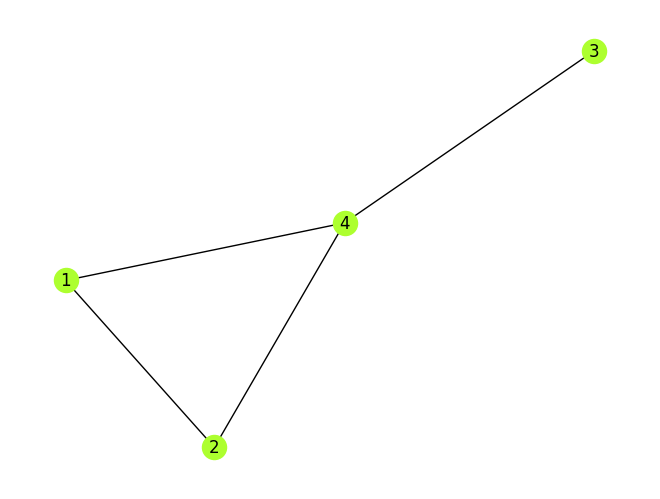

In [1]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 2), (1, 4), (2, 4), (4, 3)])
nx.draw(G, with_labels=True, node_color='greenyellow')

In [2]:
# 2の隣接ノード
print(list(G[2]))

# 各ノードの次数
print(G.degree)

[1, 4]
[(1, 2), (2, 2), (4, 3), (3, 1)]


### 有向グラフ

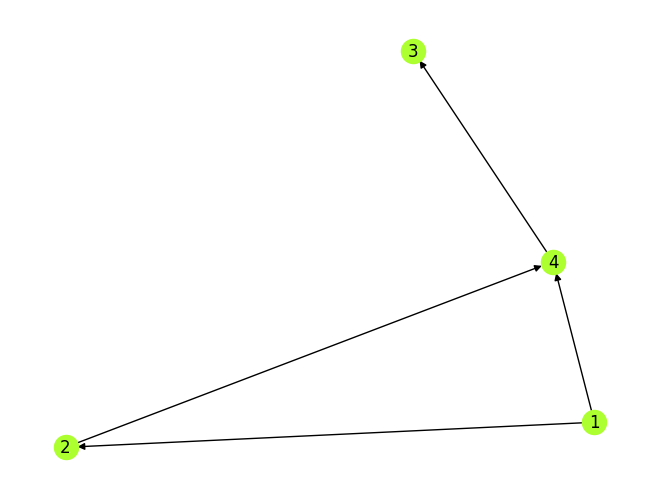

In [3]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 2), (1, 4), (2, 4), (4, 3)])
nx.draw(G, with_labels=True, node_color='greenyellow')

### グラフの描画


ファイルからグラフを構築し描画する関数を作っておく。

対応するパターン

| ファイル名  | 関数             | グラフ | パターン     | 問題                                                                                                                                                                                                                                                          |
|---------------|---------------|---------------|---------------|---------------|
| input-a.dat | `draw_pattern_a` | 無向   | エッジ/行    | [A61](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bi), [B61](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_eh)                                                                                                                  |
| input-b.dat | `draw_pattern_b` | 有向   | 隣接リスト   | [ALDS1_11_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_A), [ALDS1_11_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_B), [ALDS1_11_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_C) |
| input-c.dat | `draw_pattern_c` | 無向   | エッジの追加 | [A66](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bn)                                                                                                                                                                                         |
| input-d.dat | `draw_pattern_d` | 無向   | 連結成分     | [ALDS1_11_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_D)                                                                                                                                                                           |

このコードはグラフの可視化のためのものである。問題を解くだけなら必要ない。

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def plot(G,pos=None):
  plt.figure(figsize=(6, 4))
  nx.draw(G, pos, with_labels=True, node_color='greenyellow');
  plt.show();

def draw_pattern_a():
  with open('input-a.dat', 'r') as f:
    input = f.readline # 標準入力の場合と合わせるため
    n, m = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1)) # エッジをもたないノードがあり得るため
    for _ in range(m):
      u, v = map(int, input().split())
      G.add_edge(u, v)
    plot(G)

def draw_pattern_b():
  with open('input-b.dat', 'r') as f:
    input = f.readline
    n = int(input())
    G = nx.DiGraph()
    for _ in range(n):
      u, k, *x = map(int, input().split())
      for v in x: G.add_edge(u, v)
    plot(G)

def draw_pattern_c():
  with open('input-c.dat', 'r') as f:
    input = f.readline
    n, q = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    pos = nx.spring_layout(G)
    for _ in range(q):
      t, u, v = map(int, input().split())
      if t == 1:
        G.add_edge(u, v)
        plot(G, pos)

def draw_pattern_d():
  with open('input-d.dat', 'r') as f:
    input = f.readline
    n, m = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for _ in range(m):
      u, v = map(int, input().split())
      G.add_edge(u, v)
    plot(G)

## グラフの表現

### ♥networkxを使う（エッジ→隣接リスト）


♥問題：[A61 - Adjacent Vertices](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bi)

In [5]:
%%writefile input-a.dat
5 4
1 2
2 3
3 4
3 5

Writing input-a.dat


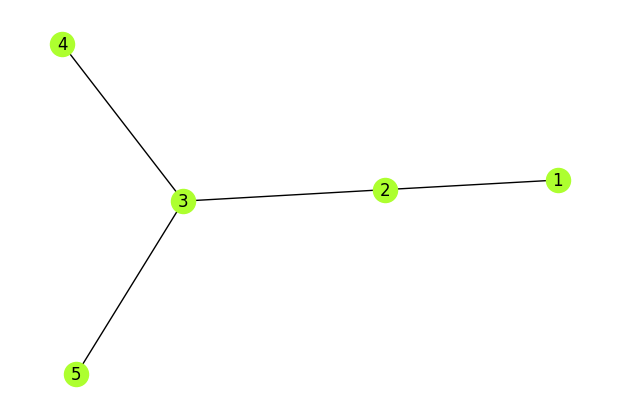

In [7]:
draw_pattern_a()

In [8]:
%%writefile test.py
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1)) # エッジを追加するだけでは足りない。
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

# 隣接リストを出力する。
for u in range(1, n + 1):
  print(f'{u}: {{{", ".join(map(str, G[u]))}}}')


Writing test.py


In [9]:
!python3 test.py < input-a.dat

1: {2}
2: {1, 3}
3: {2, 4, 5}
4: {3}
5: {3}


問題：[B61 - Influencer](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_eh)

A61と同じデータを使う。グラフの構築方法は同じ。`G.degree`で次数を取得し，最大のものを出力する。

準備`(数0, 数1)`のリストから，数1が最大のものを取得する方法を確認する。数1を取り出す関数「`lambda x: x[1]`」を`max`に渡せばよい。

In [10]:
data = [(1, 2), (2, 5), (3, 3), (4, 0)]
max(data, key = lambda x: x[1])

(2, 5)

この方法を使って，`(ノード, 次数)`のリストから次数が最大のノードを取得する。

In [12]:
%%writefile test.py
# 出力以外はA61と同じ
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1)) # エッジを追加するだけでは足りない。
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

# 結果の出力
print(max(G.degree, key=lambda x: x[1])[0])

Overwriting test.py


In [13]:
!python3 test.py < input-a.dat

3


### ♦networkxを使わない（隣接リスト→隣接行列）


♦問題：[ALDS1_11_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_A) (Graph)

In [14]:
%%writefile input-b.dat
4
1 2 2 4
2 1 4
3 0
4 1 3

Writing input-b.dat


In [ ]:
draw_pattern_b()

In [ ]:
%%writefile test.py
n = int(input())
adj_matrix = [[0] * n for _ in range(n)]

# データを読んで，隣接行列を更新する。
for _ in range(n):
  u,k,*x=map(int,input().split())
  for v in x: adj_matrix[u-1][v-1]=1

for row in adj_matrix: print(*row)

In [16]:
a,b,*c=input().split()
print(a)
print(b)
print(c)

1 2 3 4 5 6 7 8 9
1
2
['3', '4', '5', '6', '7', '8', '9']


In [ ]:
!python3 test.py < input-b.dat

## 深さ優先探索


アルゴリズム図鑑

ライブラリの使い方を確認する。

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([
    ('A', 'B'), ('A', 'C'),
    ('B', 'E'), ('B', 'F'), ('C', 'H'),
    ('E', 'K'), ('X', 'Z')])
nx.draw(G, with_labels=True, node_color='greenyellow')

深さ優先探索（その1）

In [ ]:
list(nx.dfs_edges(G, source='A'))

深さ優先探索（その2）

In [ ]:
list(nx.dfs_preorder_nodes(G, source='A'))

### ♥networkxを使う


♥問題：[A62 - Depth First Search](https://atcoder.jp/contests/tessoku-book/tasks/math_and_algorithm_am)

In [ ]:
%%writefile input-a.dat
6 6
1 4
2 3
3 4
5 6
1 2
2 4

In [ ]:
draw_pattern_a()

#### 方法1（連結かどうかを調べる）


グラフが連結かどうかを`nx.is_connected`で調べる。

In [ ]:
%%writefile test.py
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

if nx.is_connected(G): print("The graph is connected.")
else: print("The graph is not connected.")

In [ ]:
!python3 test.py < input-a.dat

#### 方法2（深さ優先探索）


深さ優先探索を`nx.dfs_preorder_nodes`で行い，全ノードを訪問できるかどうかを調べる。

In [ ]:
%%writefile test.py
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

result = list(nx.dfs_preorder_nodes(G, source=1))
if len(result) == n: print("The graph is connected.")
else: print("The graph is not connected.")

In [ ]:
!python3 test.py < input-a.dat

### ♦networkxを使わない


♦問題：[ALDS1_11_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_B) (Depth First Search)

In [ ]:
%%writefile input-b.dat
6
1 2 2 3
2 2 3 4
3 1 5
4 1 6
5 1 6
6 0

In [ ]:
draw_pattern_b()

この可視化結果を見ながら，紙とペンで出力を再現してみよう。

ここでは，スタックを使う実装は割愛し，再帰を使う実装のみを示す。また，教科書では隣接行列を使っているが，ここでは隣接リストを使う（入力が隣接リストだから，それをそのまま使うのが簡単。計算量は $O(|V|^2)$ ではなく $O(|V|+|E|)$ となる。$|E|$ が大きくなれば同じこと）。

In [ ]:
%%writefile test.py
n = int(input())
adj_list = [None] + [[] for _ in range(n)] # 隣接リスト

# 隣接リストを完成させる。
for _ in range(n):
  u, k, *v = map(int, input().split())
  adj_list[u] = v

# 深さ優先探索の定義
def dfs(u, t):
  # 未発見の場合
    # 発見時刻を記録し，時刻を進める。
    # 再帰
    # 完了時刻を記録し，時刻を進める。
  return t # 時刻を返す。

# 深さ優先探索の実行（連結でない場合を考慮する）
d = [None] + [0] * n # 発見時刻
f = [None] + [0] * n # 完了時刻
t = 1 # 時刻
for u in range(1, n + 1): t = dfs(u, t)

# 結果の表示
for u in range(1, n + 1): print(u, d[u], f[u])

In [ ]:
!python3 test.py < input-b.dat

## 幅優先探索


アルゴリズム図鑑

ライブラリの使い方を確認する。

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([
    ('A', 'B'), ('A', 'C'),
    ('B', 'E'), ('B', 'F'), ('C', 'H'),
    ('E', 'K'), ('X', 'Z')])
nx.draw(G, with_labels=True, node_color='greenyellow')

幅優先探索

In [ ]:
list(nx.bfs_edges(G, 'A'))

幅優先探索を応用して最短経路長を求める。

In [ ]:
nx.single_source_shortest_path_length(G, 'A')

### ♥networkxを使う


♥問題：[A63 - Shortest Path 1](https://atcoder.jp/contests/tessoku-book/tasks/math_and_algorithm_an)

In [ ]:
%%writefile input-a.dat
6 6
1 4
2 3
3 4
5 6
1 2
2 4

In [ ]:
draw_pattern_a()

#### 方法1（最短経路）


指定したノードからの，グラフの全てのノードへの最短経路長を`nx.single_source_shortest_path_length`で求める。

In [ ]:
%%writefile test.py
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

result = nx.single_source_shortest_path_length(G, 1) # 最短経路長

for u in range(1, n + 1):
  if u in result: print(result[u])
  else: print(-1)

In [ ]:
!python3 test.py < input-a.dat

#### 方法2（幅優先探索）


幅優先探索のためのエッジを`nx.bfs_edges`で取得し，それを使って最短経路長を求める。

In [ ]:
%%writefile test.py
import networkx as nx

# 無向グラフを作る。
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))
for _ in range(m):
  u, v = map(int, input().split())
  G.add_edge(u, v)

d = [None] + [-1] * n # 距離を記録するリスト（到達できないノードは-1）
d[1] = 0

for parent, child in nx.bfs_edges(G, 1): # 幅優先探索
  d[child] = d[parent] + 1

for u in range(1, n + 1): print(d[u])

In [ ]:
!python3 test.py < input-a.dat

### ♦networkxを使わない


♦問題：[ALDS1_11_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_C) (Breadth First Search)

In [ ]:
%%writefile input-b.dat
4
1 2 2 4
2 1 4
3 0
4 1 3

In [ ]:
draw_pattern_b()

In [ ]:
%%writefile test.py
n = int(input())
adj_list = [None] + [[] for _ in range(n)] # 隣接リスト

# 隣接リストを完成させる。
for _ in range(n):
  u, k, *v = map(int, input().split())
  adj_list[u] = v

from collections import deque

d = [None] + [-1] * n # 距離を記録するリスト（到達できないノードは-1）
d[1] = 0

# 幅優先探索
# キューにノード1を入れる。
# キューが空でない間は繰り返す。
  # キューからノードを取り出す。
  # ノードから行けるノードに対して
    # 未探索なら
    # 距離を更新して
    # キューに入れる

for u in range(1, n + 1): print(u, d[u])

In [ ]:
!python3 test.py < input-b.dat

## ♠連結成分

### ♥networkxを使う


♠♥問題：[A66 - Connect Query](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bn)

In [ ]:
%%writefile input-c.dat
3 4
1 1 2
2 1 3
1 2 3
2 2 3

In [ ]:
draw_pattern_c()

Union-Find（森を使って連結成分を管理する方法）を使う。

In [ ]:
%%writefile test.py
import networkx as nx

n, q = map(int, input().split())
uf = nx.utils.UnionFind(range(1, n + 1))

for _ in range(q):
  t, u, v = map(int, input().split())
  if t == 1: uf.union(u, v)
  elif uf[u] == uf[v]: print('Yes')
  else: print('No')

In [ ]:
!python3 test.py < input-c.dat

### ♦networkxを使わない


♠♦問題：[ALDS1_11_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_D) (Connected Components)

In [ ]:
%%writefile input-d.dat
10 9
0 1
0 2
3 4
5 7
5 6
6 7
6 8
7 8
8 9
3
0 1
5 9
1 3

In [ ]:
draw_pattern_d()

In [ ]:
%%writefile test.py
import sys
sys.setrecursionlimit(110000) # 再帰の回数の上限を増やしておく。

# グラフの構築
n, m = map(int, input().split())
adj_list = [[] for _ in range(n)]

for _ in range(m):
  u, v = map(int, input().split())
  adj_list[u].append(v)
  adj_list[v].append(u) # 反対も必要

# 深さ優先探索で到達できるノードのcolorをidにする関数
def dfs(a, id):
  # 未探索（colorがNone）なら
    # 色をつけて
    # 再帰的に探索する。

# 色分け
color = [None] * n
id = 0
# 全てのノードに対して
  # DFSで色を付ける。
  # 色を変える。

# 質問の処理
q = int(input())
for _ in range(q):
  a, b = map(int, input().split())
  if color[a] == color[b]: print('yes')
  else: print('no')

In [ ]:
!python3 test.py < input-d.dat

## 宿題


networkxの使い方を学びたい（手軽）。

-   ♥[A61 - Adjacent Vertices](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bi)
-   ♠♥[B61 - Influencer](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_eh)
-   ♥[A62 - Depth First Search](https://atcoder.jp/contests/tessoku-book/tasks/math_and_algorithm_am)
-   ♥[A63 - Shortest Path 1](https://atcoder.jp/contests/tessoku-book/tasks/math_and_algorithm_an)
-   ♠♥[A66 - Connect Query](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bn)

アルゴリズムを自分で実装したい。

-   ♦[ALDS1_11_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_A) (Graph)
-   ♦[ALDS1_11_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_B) (Depth First Search)
-   ♦[ALDS1_11_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_C) (Breadth First Search)
-   ♠♦[ALDS1_11_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/11/ALDS1_11_D) (Connected Components)

以上